Problem 1

In [12]:
import pandas as pd  # 用于数据处理和操作
import matplotlib.pyplot as plt  # 用于绘制图表
from sklearn.datasets import load_iris  # 用于加载鸢尾花数据集
from sklearn.tree import DecisionTreeClassifier  # 用于创建决策树分类器
from sklearn.model_selection import train_test_split  # 用于划分训练集和测试集
from sklearn.metrics import classification_report  # 用于评估模型表现


# 加载数据集
iris = load_iris()

# 将数据转换为Pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 添加目标列：分类的标签
df['target'] = iris.target

# 显示数据的前几行，检查数据是否正确
print(df.head())

# 划分数据集为训练集和测试集
X = df.drop(columns='target')  # 除去目标标签的所有特征数据
y = df['target']  # 目标标签

# 使用70%的数据进行训练，30%的数据用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=66)

# 创建一个空的字典，用于保存每个树深度下的模型表现
scores = {'depth': [], 'precision': [], 'recall': [], 'f1': []}

# 进行不同树深度（1到5）的实验
for depth in range(1, 6):  # 树深度从1到5，构建不同的决策树
    # 创建决策树分类器
    clf = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=depth, random_state=66)
    
    # 使用训练集数据进行模型训练
    clf.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = clf.predict(X_test)
    
    # 获取分类报告，计算精度、召回率和F1得分
    report = classification_report(y_test, y_pred, output_dict=True,zero_division=0)
    
    # 保存每个树深度下的macro平均评估指标
    scores['depth'].append(depth)
    scores['precision'].append(report['macro avg']['precision'])
    scores['recall'].append(report['macro avg']['recall'])
    scores['f1'].append(report['macro avg']['f1-score'])

# 将结果保存为DataFrame，方便查看
score_df = pd.DataFrame(scores)
score_df
print(score_df) # 如果在Python终端里运行，需要加print




   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
   depth  precision    recall        f1
0      1   0.500000  0.666667  0.555556
1      2   0.915535  0.911111  0.910714
2      3   0.979167  0.977778  0.977753
3      4   0.979167  0.977778  0.977753
4      5   0.979167  0.977778  0.977753


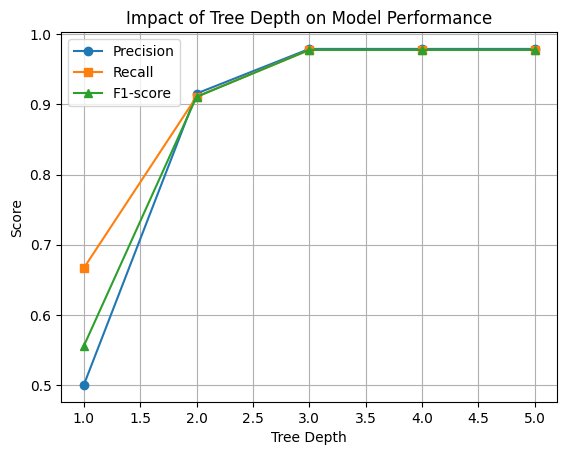

In [13]:
import matplotlib.pyplot as plt

plt.plot(score_df["depth"], score_df["precision"], marker='o', label="Precision")
plt.plot(score_df["depth"], score_df["recall"], marker='s', label="Recall")
plt.plot(score_df["depth"], score_df["f1"], marker='^', label="F1-score")
plt.xlabel("Tree Depth")
plt.ylabel("Score")
plt.title("Impact of Tree Depth on Model Performance")
plt.legend()
plt.grid()
plt.show()


In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 创建一个空的字典，用于保存每个树深度下的模型表现
scores = {
    'depth': [],
    'precision_macro': [], 'recall_macro': [], 'f1_macro': [],
    'precision_micro': [], 'recall_micro': [], 'f1_micro': [],
    'precision_weighted': [], 'recall_weighted': [], 'f1_weighted': [],
    'precision_0': [], 'recall_0': [], 'f1_0': [],
    'precision_1': [], 'recall_1': [], 'f1_1': [],
    'precision_2': [], 'recall_2': [], 'f1_2': []
}

# 遍历不同的树深度
for depth in range(1, 6):
    # 创建决策树分类器
    clf = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=depth, random_state=66)
    
    # 训练模型
    clf.fit(X_train, y_train)
    
    # 预测测试集
    y_pred = clf.predict(X_test)
    
    # 获取分类报告
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # 记录树深度
    scores['depth'].append(depth)
    
    # 存储 Macro 平均 Precision、Recall、F1-score
    scores['precision_macro'].append(report['macro avg']['precision'])
    scores['recall_macro'].append(report['macro avg']['recall'])
    scores['f1_macro'].append(report['macro avg']['f1-score'])

    # 存储 Micro 平均 Precision、Recall、F1-score
    scores['precision_micro'].append(report['accuracy'])  # Micro Precision = Accuracy
    scores['recall_micro'].append(report['accuracy'])  # Micro Recall = Accuracy
    scores['f1_micro'].append(report['accuracy'])  # Micro F1-score = Accuracy

    # 存储 Weighted 平均 Precision、Recall、F1-score
    scores['precision_weighted'].append(report['weighted avg']['precision'])
    scores['recall_weighted'].append(report['weighted avg']['recall'])
    scores['f1_weighted'].append(report['weighted avg']['f1-score'])

    # 存储每个类别的 Precision、Recall 和 F1-score
    for label in [0, 1, 2]:  # y 有 3 个类别 (0,1,2)
        scores[f'precision_{label}'].append(report[str(label)]['precision'])
        scores[f'recall_{label}'].append(report[str(label)]['recall'])
        scores[f'f1_{label}'].append(report[str(label)]['f1-score'])

# 将结果保存为 DataFrame，方便查看
score_df = pd.DataFrame(scores)
score_df
print(score_df)



   depth  precision_macro  recall_macro  f1_macro  precision_micro  \
0      1         0.500000      0.666667  0.555556         0.666667   
1      2         0.915535      0.911111  0.910714         0.911111   
2      3         0.979167      0.977778  0.977753         0.977778   
3      4         0.979167      0.977778  0.977753         0.977778   
4      5         0.979167      0.977778  0.977753         0.977778   

   recall_micro  f1_micro  precision_weighted  recall_weighted  f1_weighted  \
0      0.666667  0.666667            0.500000         0.666667     0.555556   
1      0.911111  0.911111            0.915535         0.911111     0.910714   
2      0.977778  0.977778            0.979167         0.977778     0.977753   
3      0.977778  0.977778            0.979167         0.977778     0.977753   
4      0.977778  0.977778            0.979167         0.977778     0.977753   

   precision_0  recall_0  f1_0  precision_1  recall_1      f1_1  precision_2  \
0          1.0       1.0

Problem 2

In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# 加载数据
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_Cell_Size',
                'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
                'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df = pd.read_csv(url, names=column_names, na_values='?')
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median()) # 用中位数填充有缺失值的列的缺失值

print(df.isnull().sum()) # 检查是否还有缺失值
print(df.head()) # 检查一下数据

# 特征与标签，将原始数据转为二分类
X = df.drop(['Sample_code_number', 'Class'], axis=1)
y = df['Class'].apply(lambda x: 1 if x == 4 else 0)

# 训练决策树
clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=66)
clf.fit(X, y)

# 找到第一个划分的特征
first_split_feature_idx = clf.tree_.feature[0] # 获取第一个分裂特征的索引
first_split_feature_name = X.columns[first_split_feature_idx]  # 获取特征名称
first_split_threshold = clf.tree_.threshold[0] # 获取分裂阈值（决策边界）

print(f"Feature selected for the first split: {first_split_feature_name}")
print(f"Decision boundary value: {first_split_threshold}\n")

# 定义计算公式：熵，基尼指数和分类误差
def entropy(p):
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p)) if 0 < p < 1 else 0

def gini(p):
    return 1 - p**2 - (1 - p)**2

def misclassification_error(p):
    return 1 - max(p, 1 - p)

# 父节点计算
p_parent = (y == 1).sum() / len(y) # 计算整个数据集中，恶性肿瘤（1）占比多少
entropy_parent = entropy(p_parent) # 按照定义的函数计算父节点的熵，基尼指数和分类误差
gini_parent = gini(p_parent)
error_parent = misclassification_error(p_parent)

# 确定左子节点和右子节点的数据量，添加布尔索引
left_indices = X[first_split_feature_name] <= first_split_threshold # 小于等于阈值的在左节点，转化为布尔数组
right_indices = X[first_split_feature_name] > first_split_threshold # 大于阈值的在右节点

p_left = (y[left_indices] == 1).sum() / len(y[left_indices])  # 计算左子结点的恶性比例
p_right = (y[right_indices] == 1).sum() / len(y[right_indices])  # 计算右子节点的恶性比例

# 再分别计算左右子节点的熵，基尼指数和分类误差
entropy_left = entropy(p_left)
entropy_right = entropy(p_right)

gini_left = gini(p_left)
gini_right = gini(p_right)

error_left = misclassification_error(p_left)
error_right = misclassification_error(p_right)

print(f"Entropy of the left node: {entropy_left}")
print(f"Entropy of the right node: {entropy_right}")
print(f"Gini index of the left node: {gini_left}")
print(f"Gini index of the right node: {gini_right}")
print(f"Misclassification error of the left node: {error_left}")
print(f"Misclassification error of the right node: {error_right}")

#  计算划分后的整体指标
n = len(y) # 总样本数
n_left = left_indices.sum() # 左子节点的样本数
n_right = right_indices.sum() # 右子节点的样本数

# 利用左右子节点的熵，基尼指数和分类误差计算划分后的整体熵，基尼指数和分类误差
entropy_after = (n_left / n) * entropy_left + (n_right / n) * entropy_right
gini_after = (n_left / n) * gini_left + (n_right / n) * gini_right
error_after = (n_left / n) * error_left + (n_right / n) * error_right

# 计算信息增益
information_gain = entropy_parent - entropy_after

# 输出指标结果
print(f"Parent node Entropy: {entropy_parent:.4f}, Gini: {gini_parent:.4f}, Misclassification Error: {error_parent:.4f}")
print(f"After splitting（overall) Entropy: {entropy_after:.4f}, Gini: {gini_after:.4f}, Misclassification Error: {error_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")


Sample_code_number             0
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64
   Sample_code_number  Clump_Thickness  Uniformity_Cell_Size  \
0             1000025                5                     1   
1             1002945                5                     4   
2             1015425                3                     1   
3             1016277                6                     8   
4             1017023                4                     1   

   Uniformity_Cell_Shape  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                      1                  1                            2   
1                      4                  5                            7   
2          

Problem 3

In [11]:
import pandas as pd  # 用于数据处理
import numpy as np  # 用于数值计算
from sklearn.decomposition import PCA  # 进行主成分分析（PCA 降维）
from sklearn.tree import DecisionTreeClassifier  # 决策树分类器
from sklearn.model_selection import train_test_split  # 划分训练集和测试集
from sklearn.metrics import classification_report, confusion_matrix  # 计算评估指标

# 指定数据集的 URL（UCI 机器学习仓库）
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# 定义列名（根据数据集描述）
column_names = [
    "ID", "Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean",
    "Smoothness_mean", "Compactness_mean", "Concavity_mean", "Concave_points_mean",
    "Symmetry_mean", "Fractal_dimension_mean", "Radius_se", "Texture_se", "Perimeter_se",
    "Area_se", "Smoothness_se", "Compactness_se", "Concavity_se", "Concave_points_se",
    "Symmetry_se", "Fractal_dimension_se", "Radius_worst", "Texture_worst",
    "Perimeter_worst", "Area_worst", "Smoothness_worst", "Compactness_worst",
    "Concavity_worst", "Concave_points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]

# 读取数据，数据没有标题，需要手动指定列名
df = pd.read_csv(url, names=column_names)

# 查看前几行数据
print(df.head())

# 转换标签（B=0, M=1）
df['Diagnosis'] = df["Diagnosis"].apply(lambda x: 1 if x == "M" else 0)

print(df.isnull().sum())  # 检查数据类型，是否有缺失值
print(df["Diagnosis"].value_counts())  # 确保转换后的标签只有 0 和 1

# 划分训练集（70%）和测试集（30%）
X = df.drop(columns=["Diagnosis","ID"],axis=1)  # 特征,ID没用
y = df["Diagnosis"]  # 目标变量

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=66)


# 创建并训练决策树分类器，这是没有降维的时候
clf = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=66)
clf.fit(X_train, y_train)  # 训练模型
# 在测试集上进行预测
y_pred = clf.predict(X_test)
# 计算分类报告
report = classification_report(y_test, y_pred, output_dict=True)
# 提取 F1 Score、Precision、Recall
precision = report["macro avg"]["precision"]
recall = report["macro avg"]["recall"]
f1_score = report["macro avg"]["f1-score"]
# 打印结果
print(f"----------Evaluation Results of Decision Tree Model without PCA------------")
print(classification_report(y_test, y_pred))
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1 Score: {f1_score:.4f}")





         ID Diagnosis  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius_worst  Texture_worst  Perimeter_worst  Area_wor

In [12]:
# 进行 PCA 降维，仅取第一主成分（PC1）
pca = PCA(n_components=1)  # 只保留 1 个主成分
X_pca_train = pca.fit_transform(X_train)  # 在训练集上拟合 PCA 并转换
X_pca_test = pca.transform(X_test)  # 在测试集上进行相同的转换

# 打印 PCA 解释的方差比例
explained_variance = pca.explained_variance_ratio_[0]


# 创建并训练决策树分类器（仅用 PC1）
clf_pca = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=66)
clf_pca.fit(X_pca_train, y_train)  # 训练模型
# 在测试集上进行预测
y_pred_pca = clf_pca.predict(X_pca_test)
# 计算分类报告
report_pca = classification_report(y_test, y_pred_pca, output_dict=True)

# 提取 F1 Score、Precision、Recall
precision_pca = report_pca["macro avg"]["precision"]
recall_pca = report_pca["macro avg"]["recall"]
f1_score_pca = report_pca["macro avg"]["f1-score"]

# 打印结果
print(f"------------Evaluation Results of Decision Tree Model with PCA (PC1)---------------")
print(f"Explained Variance Ratio of PC1: {explained_variance:.4f}")
print(classification_report(y_test, y_pred_pca))
print(f"Macro Precision: {precision_pca:.4f}")
print(f"Macro Recall: {recall_pca:.4f}")
print(f"Macro F1 Score: {f1_score_pca:.4f}")



------------Evaluation Results of Decision Tree Model with PCA (PC1)---------------
Explained Variance Ratio of PC1: 0.9800
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       107
           1       0.96      0.73      0.83        64

    accuracy                           0.89       171
   macro avg       0.91      0.86      0.87       171
weighted avg       0.90      0.89      0.89       171

Macro Precision: 0.9099
Macro Recall: 0.8578
Macro F1 Score: 0.8744


In [13]:
# 进行 PCA 降维，取前两个主成分（PC1 + PC2）
pca_2 = PCA(n_components=2)  # 取前 2 个主成分
X_pca2_train = pca_2.fit_transform(X_train)  # 在训练集上拟合 PCA 并转换
X_pca2_test = pca_2.transform(X_test)  # 在测试集上进行相同的转换

# 打印前两个主成分解释的方差比例
explained_variance_pc1 = pca_2.explained_variance_ratio_[0]
explained_variance_pc2 = pca_2.explained_variance_ratio_[1]
total_explained_variance = explained_variance_pc1 + explained_variance_pc2

# 创建并训练决策树分类器（仅用 PC1 + PC2）
clf_pca2 = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=66)
clf_pca2.fit(X_pca2_train, y_train)  # 训练模型
# 在测试集上进行预测
y_pred_pca2 = clf_pca2.predict(X_pca2_test)
# 计算分类报告
report_pca2 = classification_report(y_test, y_pred_pca2, output_dict=True)

# 提取 F1 Score、Precision、Recall
precision_pca2 = report_pca2["macro avg"]["precision"]
recall_pca2 = report_pca2["macro avg"]["recall"]
f1_score_pca2 = report_pca2["macro avg"]["f1-score"]

# 打印结果
print(f"---------------Evaluation Results of Decision Tree Model with PCA (PC1 + PC2)----------------")
print(f"Explained Variance Ratio of PC1: {explained_variance_pc1:.4f}")
print(f"Explained Variance Ratio of PC2: {explained_variance_pc2:.4f}")
print(f"Total Explained Variance Ratio of PC1 + PC2: {total_explained_variance:.4f}")
print(classification_report(y_test, y_pred_pca2))
print(f"Macro Precision: {precision_pca2:.4f}")
print(f"Macro Recall: {recall_pca2:.4f}")
print(f"Macro F1 Score: {f1_score_pca2:.4f}")


---------------Evaluation Results of Decision Tree Model with PCA (PC1 + PC2)----------------
Explained Variance Ratio of PC1: 0.9800
Explained Variance Ratio of PC2: 0.0179
Total Explained Variance Ratio of PC1 + PC2: 0.9979
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       107
           1       0.96      0.73      0.83        64

    accuracy                           0.89       171
   macro avg       0.91      0.86      0.87       171
weighted avg       0.90      0.89      0.89       171

Macro Precision: 0.9099
Macro Recall: 0.8578
Macro F1 Score: 0.8744


In [14]:
# 计算原始数据模型的混淆矩阵
conf_matrix_orig = confusion_matrix(y_test, y_pred)

# 提取 FP, TP, FN, TN
TN_orig, FP_orig, FN_orig, TP_orig = conf_matrix_orig.ravel()

# 计算 FPR 和 TPR
FPR_orig = FP_orig / (FP_orig + TN_orig)
TPR_orig = TP_orig / (TP_orig + FN_orig)

print(f"-------------Decision Tree Model with Original（continuous） Data--------------")
print(f"Confusion Matrix:\n{conf_matrix_orig}")
print(f"False Positives (FP): {FP_orig}")
print(f"True Positives (TP): {TP_orig}")
print(f"False Positive Rate (FPR): {FPR_orig:.4f}")
print(f"True Positive Rate (TPR / Recall): {TPR_orig:.4f}")


-------------Decision Tree Model with Original（continuous） Data--------------
Confusion Matrix:
[[102   5]
 [  7  57]]
False Positives (FP): 5
True Positives (TP): 57
False Positive Rate (FPR): 0.0467
True Positive Rate (TPR / Recall): 0.8906


In [15]:
# 计算 PCA(PC1) 模型的混淆矩阵
conf_matrix_pca1 = confusion_matrix(y_test, y_pred_pca)

# 提取 FP, TP, FN, TN
TN_pca1, FP_pca1, FN_pca1, TP_pca1 = conf_matrix_pca1.ravel()

# 计算 FPR 和 TPR
FPR_pca1 = FP_pca1 / (FP_pca1 + TN_pca1)
TPR_pca1 = TP_pca1 / (TP_pca1 + FN_pca1)

print(f"----------------Decision Tree Model with PCA (PC1)-------------------")
print(f"Confusion Matrix:\n{conf_matrix_pca1}")
print(f"False Positives (FP): {FP_pca1}")
print(f"True Positives (TP): {TP_pca1}")
print(f"False Positive Rate (FPR): {FPR_pca1:.4f}")
print(f"True Positive Rate (TPR / Recall): {TPR_pca1:.4f}")


----------------Decision Tree Model with PCA (PC1)-------------------
Confusion Matrix:
[[105   2]
 [ 17  47]]
False Positives (FP): 2
True Positives (TP): 47
False Positive Rate (FPR): 0.0187
True Positive Rate (TPR / Recall): 0.7344


In [16]:
# 计算 PCA(PC1 + PC2) 模型的混淆矩阵
conf_matrix_pca2 = confusion_matrix(y_test, y_pred_pca2)

# 提取 FP, TP, FN, TN
TN_pca2, FP_pca2, FN_pca2, TP_pca2 = conf_matrix_pca2.ravel()

# 计算 FPR 和 TPR
FPR_pca2 = FP_pca2 / (FP_pca2 + TN_pca2)
TPR_pca2 = TP_pca2 / (TP_pca2 + FN_pca2)

print(f"-----------------Decision Tree Model with PCA (PC1 + PC2)-----------------")
print(f"Confusion Matrix:\n{conf_matrix_pca2}")
print(f"False Positives (FP): {FP_pca2}")
print(f"True Positives (TP): {TP_pca2}")
print(f"False Positive Rate (FPR): {FPR_pca2:.4f}")
print(f"True Positive Rate (TPR / Recall): {TPR_pca2:.4f}")


-----------------Decision Tree Model with PCA (PC1 + PC2)-----------------
Confusion Matrix:
[[105   2]
 [ 17  47]]
False Positives (FP): 2
True Positives (TP): 47
False Positive Rate (FPR): 0.0187
True Positive Rate (TPR / Recall): 0.7344


In [17]:

# 加载离散型乳腺癌数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_Cell_Size',
                'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
                'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df = pd.read_csv(url, names=column_names, na_values='?')
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median())

# 特征和标签
X = df.drop(['Sample_code_number', 'Class'], axis=1)
y = df['Class'].apply(lambda x: 1 if x == 4 else 0)  # 4 为恶性(M)设为 1，2 为良性(B)设为 0

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=66)

# 构建决策树模型
clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=66)
clf.fit(X_train, y_train)

# 预测并计算混淆矩阵
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# 提取 TP, FP, FN, TN
TN, FP, FN, TP = conf_matrix.ravel()

# 计算 FPR, TPR
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

# 输出结果
print("----------Decision Tree Model with Discrete Data----------")
print("Confusion Matrix:\n", conf_matrix)
print("False Positives (FP):", FP)
print("True Positives (TP):", TP)
print("False Positive Rate (FPR): {:.4f}".format(FPR))
print("True Positive Rate (TPR / Recall): {:.4f}".format(TPR))


----------Decision Tree Model with Discrete Data----------
Confusion Matrix:
 [[130   8]
 [  9  63]]
False Positives (FP): 8
True Positives (TP): 63
False Positive Rate (FPR): 0.0580
True Positive Rate (TPR / Recall): 0.8750
